# Modis

This notebook downloads MODIS observation of hurricane Nicole in the Gulf of Mexico. In contrast to most other satellite data products, the goelocation data of MODIS observations is distributed as a seperate data product. Plotting MODIS observations on a map therefore requires downloading two product files: The geolocation file and the observation file.

In [89]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  Level 1b

MODIS observations are available from two different satellites, Aqua and Terra. Here we download observations and geolocation products from the MODIS sensor on the Aqua satellite.

## Downloading the data

In [85]:
from pansat.products.satellite.modis import modis_aqua_1km, modis_aqua_geo
t_0 = datetime(2016, 10, 12, 17, 45)
t_1 = datetime(2016, 10, 12, 17, 50)
files_rad = modis_aqua_1km.download(t_0, t_1)
files_geo = modis_aqua_geo.download(t_0, t_1)

## Generating a true color composite

Since generating a good-looking true-color composite from the raw reflectances of the Level 1b product is fairly complicates, we use the ``satpy`` package to generate a true-color composite from the MODIS observations.

In [86]:
from satpy import Scene
from glob import glob
 
scn = Scene(filenames = files_rad + files_geo, reader = 'modis_l1b')
scn.load(["true_color", "31", "32", "latitude", "longitude"], resolution=1000)
scn.save_dataset('true_color', filename='modis_true_color.png')

/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)


In [87]:
from PIL import Image
img = np.array(Image.open("modis_true_color.png")) / 256
lats = scn["latitude"].compute()
lons = scn["longitude"].compute()

Text(0.5, 0, 'Latitude [$^\\circ\\ N$]')

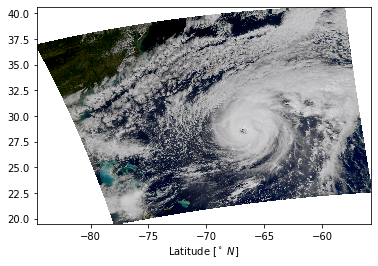

In [88]:
colors = img[:-1, :-1, :].reshape(-1, 4)
plt.pcolormesh(lons, lats, lons, color=colors)
plt.xlabel("Longitude [$^\circ\ E$]")
plt.xlabel("Latitude [$^\circ\ N$]")